In [15]:
import torch
import json
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

In [16]:
# load the following to files from DETECTED_SGG_DIR
custom_prediction = json.load(open(r'L:\Datasets\Visual_Genome\output\test_results\detected_img\custom_prediction.json'))
custom_data_info = json.load(open(r'L:\Datasets\Visual_Genome\output\test_results\detected_img\custom_data_info.json'))

In [17]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [18]:
# parameters
image_idx = 10
box_topk = 30 # select top k bounding boxes
rel_topk = 20 # select top k relationships
ind_to_classes = custom_data_info['ind_to_classes']
ind_to_predicates = custom_data_info['ind_to_predicates']

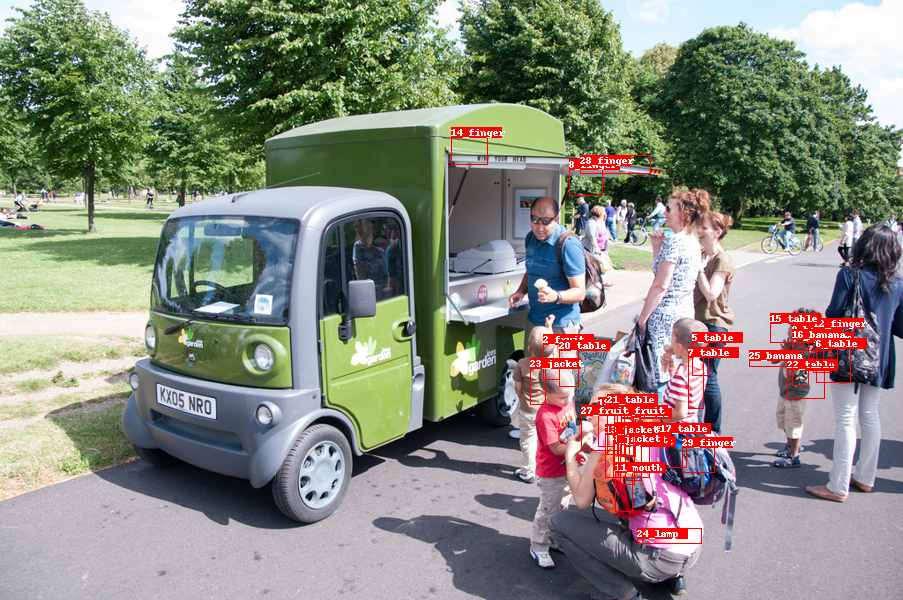

**************************************************
box_labels 0: jacket; score: 0.014468108303844929
box_labels 1: finger; score: 0.01428972464054823
box_labels 2: fruit; score: 0.014266044832766056
box_labels 3: jacket; score: 0.014181683771312237
box_labels 4: jacket; score: 0.01375185139477253
box_labels 5: table; score: 0.013083573430776596
box_labels 6: table; score: 0.013045727275311947
box_labels 7: table; score: 0.012993576005101204
box_labels 8: finger; score: 0.01297086849808693
box_labels 9: banana; score: 0.012774473056197166
box_labels 10: jacket; score: 0.012547568418085575
box_labels 11: mouth; score: 0.012464288622140884
box_labels 12: finger; score: 0.01238936185836792
box_labels 13: jacket; score: 0.012314611114561558
box_labels 14: finger; score: 0.012286261655390263
box_labels 15: table; score: 0.012266991659998894
box_labels 16: banana; score: 0.012230233289301395
box_labels 17: table; score: 0.012120538391172886
box_labels 18: table; score: 0.012107964605093002
bo

In [19]:
image_path = custom_data_info['idx_to_files'][image_idx]
boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):
    if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
        rel_scores.append(all_rel_scores[i])
        label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
        rel_labels.append(label)

rel_labels = rel_labels[:rel_topk]
rel_scores = rel_scores[:rel_topk]

draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)

# json study

In [7]:
import json
json_file = r'L:\Datasets\Visual_Genome\objects.json\objects.json'

j = open(json_file, 'r')
jdata = json.load(j)

In [3]:
jdata

[{'image_id': 1,
  'objects': [{'synsets': ['tree.n.01'],
    'h': 557,
    'object_id': 1058549,
    'merged_object_ids': [],
    'names': ['trees'],
    'w': 799,
    'y': 0,
    'x': 0},
   {'synsets': ['sidewalk.n.01'],
    'h': 290,
    'object_id': 1058534,
    'merged_object_ids': [5046],
    'names': ['sidewalk'],
    'w': 722,
    'y': 308,
    'x': 78},
   {'synsets': ['building.n.01'],
    'h': 538,
    'object_id': 1058508,
    'merged_object_ids': [],
    'names': ['building'],
    'w': 222,
    'y': 0,
    'x': 1},
   {'synsets': ['street.n.01'],
    'h': 258,
    'object_id': 1058539,
    'merged_object_ids': [3798578],
    'names': ['street'],
    'w': 359,
    'y': 283,
    'x': 439},
   {'synsets': ['wall.n.01'],
    'h': 535,
    'object_id': 1058543,
    'merged_object_ids': [],
    'names': ['wall'],
    'w': 135,
    'y': 1,
    'x': 0},
   {'synsets': ['tree.n.01'],
    'h': 360,
    'object_id': 1058545,
    'merged_object_ids': [],
    'names': ['tree'],
    'w

In [9]:
jdic = jdata[0]

In [6]:
type(jdata[0])

dict

In [10]:
for k in jdic.keys():
    print(k)

image_id
objects
image_url


In [11]:
len(jdata)

108077

In [19]:
print(jdata[0])

{'image_id': 1, 'objects': [{'synsets': ['tree.n.01'], 'h': 557, 'object_id': 1058549, 'merged_object_ids': [], 'names': ['trees'], 'w': 799, 'y': 0, 'x': 0}, {'synsets': ['sidewalk.n.01'], 'h': 290, 'object_id': 1058534, 'merged_object_ids': [5046], 'names': ['sidewalk'], 'w': 722, 'y': 308, 'x': 78}, {'synsets': ['building.n.01'], 'h': 538, 'object_id': 1058508, 'merged_object_ids': [], 'names': ['building'], 'w': 222, 'y': 0, 'x': 1}, {'synsets': ['street.n.01'], 'h': 258, 'object_id': 1058539, 'merged_object_ids': [3798578], 'names': ['street'], 'w': 359, 'y': 283, 'x': 439}, {'synsets': ['wall.n.01'], 'h': 535, 'object_id': 1058543, 'merged_object_ids': [], 'names': ['wall'], 'w': 135, 'y': 1, 'x': 0}, {'synsets': ['tree.n.01'], 'h': 360, 'object_id': 1058545, 'merged_object_ids': [], 'names': ['tree'], 'w': 476, 'y': 0, 'x': 178}, {'synsets': ['shade.n.01'], 'h': 189, 'object_id': 5045, 'merged_object_ids': [], 'names': ['shade'], 'w': 274, 'y': 344, 'x': 116}, {'synsets': ['van.

In [28]:
print(jdata[100]['image_id'])

101


In [18]:
print(jdata[0]['image_id'])
print(jdata[0]['objects'])
print(jdata[0]['image_url'])

1
[{'synsets': ['tree.n.01'], 'h': 557, 'object_id': 1058549, 'merged_object_ids': [], 'names': ['trees'], 'w': 799, 'y': 0, 'x': 0}, {'synsets': ['sidewalk.n.01'], 'h': 290, 'object_id': 1058534, 'merged_object_ids': [5046], 'names': ['sidewalk'], 'w': 722, 'y': 308, 'x': 78}, {'synsets': ['building.n.01'], 'h': 538, 'object_id': 1058508, 'merged_object_ids': [], 'names': ['building'], 'w': 222, 'y': 0, 'x': 1}, {'synsets': ['street.n.01'], 'h': 258, 'object_id': 1058539, 'merged_object_ids': [3798578], 'names': ['street'], 'w': 359, 'y': 283, 'x': 439}, {'synsets': ['wall.n.01'], 'h': 535, 'object_id': 1058543, 'merged_object_ids': [], 'names': ['wall'], 'w': 135, 'y': 1, 'x': 0}, {'synsets': ['tree.n.01'], 'h': 360, 'object_id': 1058545, 'merged_object_ids': [], 'names': ['tree'], 'w': 476, 'y': 0, 'x': 178}, {'synsets': ['shade.n.01'], 'h': 189, 'object_id': 5045, 'merged_object_ids': [], 'names': ['shade'], 'w': 274, 'y': 344, 'x': 116}, {'synsets': ['van.n.05'], 'h': 176, 'object

In [21]:
print(len(jdata[0]['objects']))

31


In [26]:
print(jdata[0]['objects'][1])

{'synsets': ['sidewalk.n.01'], 'h': 290, 'object_id': 1058534, 'merged_object_ids': [5046], 'names': ['sidewalk'], 'w': 722, 'y': 308, 'x': 78}
